In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_experimentos = pd.read_csv('dados/dados_experimentos.csv')

In [3]:
df_resultados = pd.read_csv('dados/dados_resultados.csv')

In [4]:
df_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_resultados.shape

(23814, 207)

In [6]:
df_resultados['acat_inhibitor'].unique()

array([0, 1])

In [7]:
# qual foi o mecanismo de ação mais ativado
# para isso iremos somar os valores de cada coluna
# para selecionarmos apenas as colunas dos MOAs, ou seja, excluir a coluna id
# iremos selecionar pelo tipo de dados que elas contêm

contagem_moa = df_resultados.select_dtypes('int64').sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
elastase_inhibitor                              6
steroid                                         6
atm_kinase_inhibitor                            6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [8]:
# outro jeito de fazer a mesma seleção
contagem_moa = df_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
elastase_inhibitor                              6
steroid                                         6
atm_kinase_inhibitor                            6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [9]:
# soma quantos MOAs são ativados em cada linha
df_resultados.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

In [10]:
df_resultados['n_moa'] = df_resultados.drop('id', axis=1).sum(axis=1)
df_resultados['ativo_moa'] = (df_resultados['n_moa'] != 0)
df_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


In [11]:
df_merged = pd.merge(df_experimentos, df_resultados[['id', 'n_moa', 'ativo_moa']], on='id')
df_merged.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [13]:
df_merged.to_csv('dados/dados_combinados.csv')

In [12]:
# vamos verificar se nas linhas onde o tratamento é controle, houve a ativação de algum MOA
df_merged.query('tratamento == "com_controle"')['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

In [18]:
# agora vamos ver se nas linhas onde o tratamento é droga, todas ativaram algum MOA
df_merged.query('tratamento == "com_droga"')['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

<AxesSubplot:xlabel='droga', ylabel='g-0'>

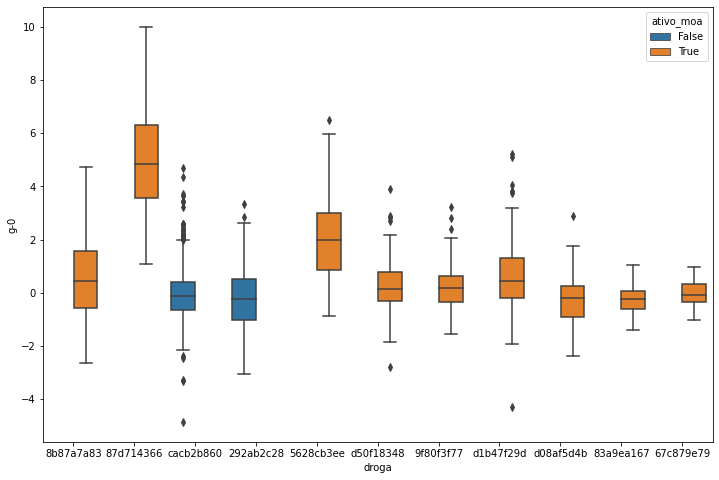

In [25]:
composto_principal = df_merged['droga'].value_counts().index[:11]
plt.figure(figsize=(12,8))
sns.boxplot(data=df_merged.query('droga in @composto_principal'), y='g-0', x='droga', hue='ativo_moa')

### Desafio 01: Encontrar o top 10 das ações dos MOA

In [38]:
list_moa = list(df_resultados.drop(['n_moa', 'ativo_moa'], axis=1).columns)
list_actions = []

for moa in list_moa:
    moa = moa.split('_')
    list_actions.append(moa[-1])

actions_series = pd.Series(list_actions)
actions_series.value_counts()[:10]

inhibitor        112
antagonist        32
agonist           28
activator          5
agent              3
blocker            2
stimulant          1
scavenger          1
antiviral          1
antiprotozoal      1
dtype: int64

### Desafio 02: Criar coluna eh_controle que irá conter um valor booleano indicando se aquela linha possui tratamento == com_controle

In [40]:
df_merged['eh_controle'] = (df_merged['tratamento'] != 'com_droga')
df_merged.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,False


### Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72 com valores 0 e 1

In [43]:
pd.get_dummies(data=df_merged, columns=['tempo'])

,id,tratamento,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,...,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle,tempo_24,tempo_48,tempo_72
0,id_000644bb2,com_droga,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,-0.3981,0.2139,0.3801,0.4176,1,True,False,1,0,0
1,id_000779bfc,com_droga,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,0.1522,0.1241,0.6077,0.7371,0,False,False,0,0,1
2,id_000a6266a,com_droga,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.6417,-0.2187,-1.4080,0.6931,3,True,False,0,1,0
3,id_0015fd391,com_droga,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False,0,1,0
4,id_001626bd3,com_droga,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.1094,0.2885,-0.3786,0.7125,1,True,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,...,0.0631,0.9171,0.5258,0.4680,1,True,False,1,0,0
23810,id_fffb70c0c,com_droga,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,...,-0.2084,-0.1224,-0.2715,0.3689,1,True,False,1,0,0
23811,id_fffc1c3f4,com_controle,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,...,0.2256,0.7592,0.6656,0.3808,0,False,True,0,1,0
23812,id_fffcb9e7c,com_droga,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,...,0.1732,0.7015,-0.6290,0.0740,1,True,False,1,0,0


### Desafio 04: Ler sobre merge, join, concatenação com pandas

### Desafio 05: Fazer análise mais detalhada, considerando tempo e dose, para comparar as distribuições (Escolher uma droga e comparar com controle)

### Desafio 06: Descobrir se temos algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA

In [70]:
df_merged_2 = pd.merge(df_experimentos[['id', 'tratamento', 'dose', 'droga', 'tempo']], df_resultados, on='id')
df_merged_2 = df_merged_2.groupby(['droga', 'dose', 'tempo'])
df_merged_2.head()

,id,tratamento,dose,droga,tempo,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,com_droga,D1,b68db1d53,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,com_droga,D1,df89a8e5a,72,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,com_droga,D1,18bb41b2c,48,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,com_droga,D1,8c7f86626,48,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,com_droga,D2,7cbed3131,72,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23807,id_fff7e6992,com_droga,D1,a28556d51,48,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
23808,id_fff8c2444,com_droga,D1,6c3a459be,72,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
23809,id_fffb1ceed,com_droga,D2,df1d0a5a1,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
23810,id_fffb70c0c,com_droga,D2,ecf3b6b74,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


In [69]:
df_merged_2['acat_inhibitor'].unique()

array([0, 1])

### Desafio 07: Descobrir se temos algum composto que dependendo da configuração do experimento, ativa MOAs diferentes

### Desafio 08: Resumo do que você aprendeu com os dados